In [468]:
#Importing Necessary Libraries

In [469]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [470]:
# file =(r'C:\Users\Prince\OneDrive\Desktop\HR Analytics\HR Analytics.xlsx)
data = pd.read_csv(r"C:\Users\Prince\OneDrive\Documents\HR Analytics\WA_Fn-UseC_-HR-Employee-Attrition.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [471]:
# pip install dtale # installing dtale

In [472]:
# import dtale
# d = dtale.show(data) 
# d

In [473]:
data.shape

(1470, 35)

In [474]:
# 1470 rows and 35 columns

In [475]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [476]:
# No null values. 

# We have Integer and object datatype only

# Our target variable is categorical hence we wil apply classification models

In [477]:
data.describe() #Statistics of our dataset

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [478]:
# minimum age is 18 and Maximum Age is 60
# It means there is no relevance of column "Over18" as all are above 18
# there is only one value in "StandardHours" i.e., 80
# "EmployeeNumber" will not provide any useful information

In [479]:
# getting the number of employees currently working and left
data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [480]:
#Visualitation of this data

<AxesSubplot:xlabel='Attrition', ylabel='count'>

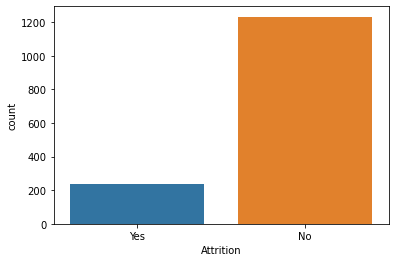

In [481]:
sns.countplot(data['Attrition'])

In [482]:
# There is a class imbalance problem we need to take care of

<AxesSubplot:xlabel='Age', ylabel='count'>

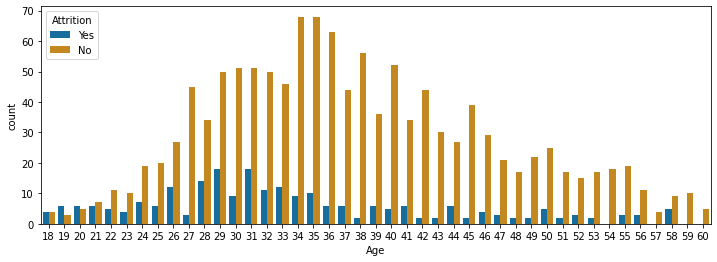

In [483]:
# Show the number of employees who stayed and left by age
plt.subplots(figsize = (12,4))
sns.countplot(x='Age', hue = 'Attrition', data= data, palette= "colorblind")


In [484]:
#majority of the people leaving are of age 29 and 30 

In [485]:
#Print all of the data_types and their unique values
for column in data.columns:
    if data[column].dtype == object:
        print(str(column) + ' : ' + str(data[column].unique()))
        print(data[column].value_counts())
        print('_____________________________________________________________________________________________')

Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
_____________________________________________________________________________________________
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
_____________________________________________________________________________________________
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
_____________________________________________________________________________________________
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dt

In [486]:
# remove irrelevant columns
data = data.drop('Over18',axis=1)
data = data.drop('EmployeeNumber', axis = 1)
data = data.drop('StandardHours', axis = 1)
data = data.drop('EmployeeCount', axis = 1)

In [487]:
data.shape # Checking the shape of our data

(1470, 31)

In [488]:
# plt.figure(figsize =(20,20), facecolor = 'white')
# plotnumber=1

# for column in data.columns:
#     if plotnumber<=32:
#         ax=plt.subplot(7,5,plotnumber)
#         sns.distplot(data[column])
#         plt.xlabel(column,fontsize=15)
#     plotnumber+=1
# plt.tight_layout()

In [489]:
#Correlation
data.corr()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


<AxesSubplot:>

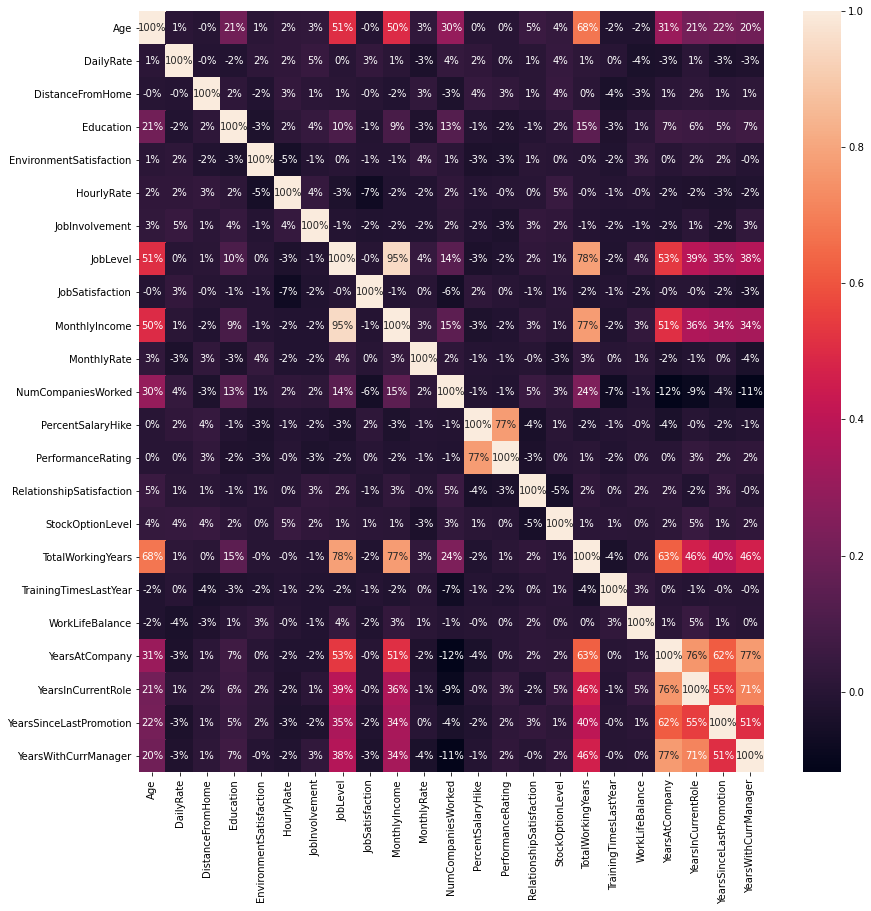

In [490]:
# let's visualize the correlation
plt.figure(figsize = (14,14))
sns.heatmap(data.corr(), annot = True, fmt = '.0%')

In [491]:
# we can see that some of the columns are correlated like,
# Monthly income and job level
# Total working years and job level
# Total working years and mothly income
# Total working years and Age

# Encoding

In [492]:
# transform the data
#transform non-numerical into numerical column
from sklearn.preprocessing import LabelEncoder

for column in data.columns:
    if data[column].dtype == np.number:
        continue
    data[column] = LabelEncoder().fit_transform(data[column])

In [493]:
#create a  new column for clarity sake
data['Age_years'] = data['Age']

In [494]:
data = data.drop('Age', axis = 1) # Drop duplicate column

In [495]:
# Show our dataframe
data

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_years
0,1,2,624,2,0,1,1,1,0,64,...,0,0,8,0,0,6,4,0,5,23
1,0,1,113,1,7,0,1,2,1,31,...,3,1,10,3,2,10,7,1,7,31
2,1,2,805,1,1,1,4,3,1,62,...,1,0,7,3,2,0,0,0,0,19
3,0,1,820,1,2,3,1,3,0,26,...,2,0,8,3,2,8,7,3,0,15
4,0,2,312,1,1,0,3,0,1,10,...,3,1,6,3,2,2,2,2,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,494,1,22,1,3,2,1,11,...,2,1,17,3,2,5,2,0,3,18
1466,0,2,327,1,5,0,3,3,1,12,...,0,1,9,5,2,7,7,1,7,21
1467,0,2,39,1,3,2,1,1,1,57,...,1,1,6,0,2,6,2,0,3,9
1468,0,1,579,2,1,2,3,3,1,33,...,3,0,17,3,1,9,6,0,8,31


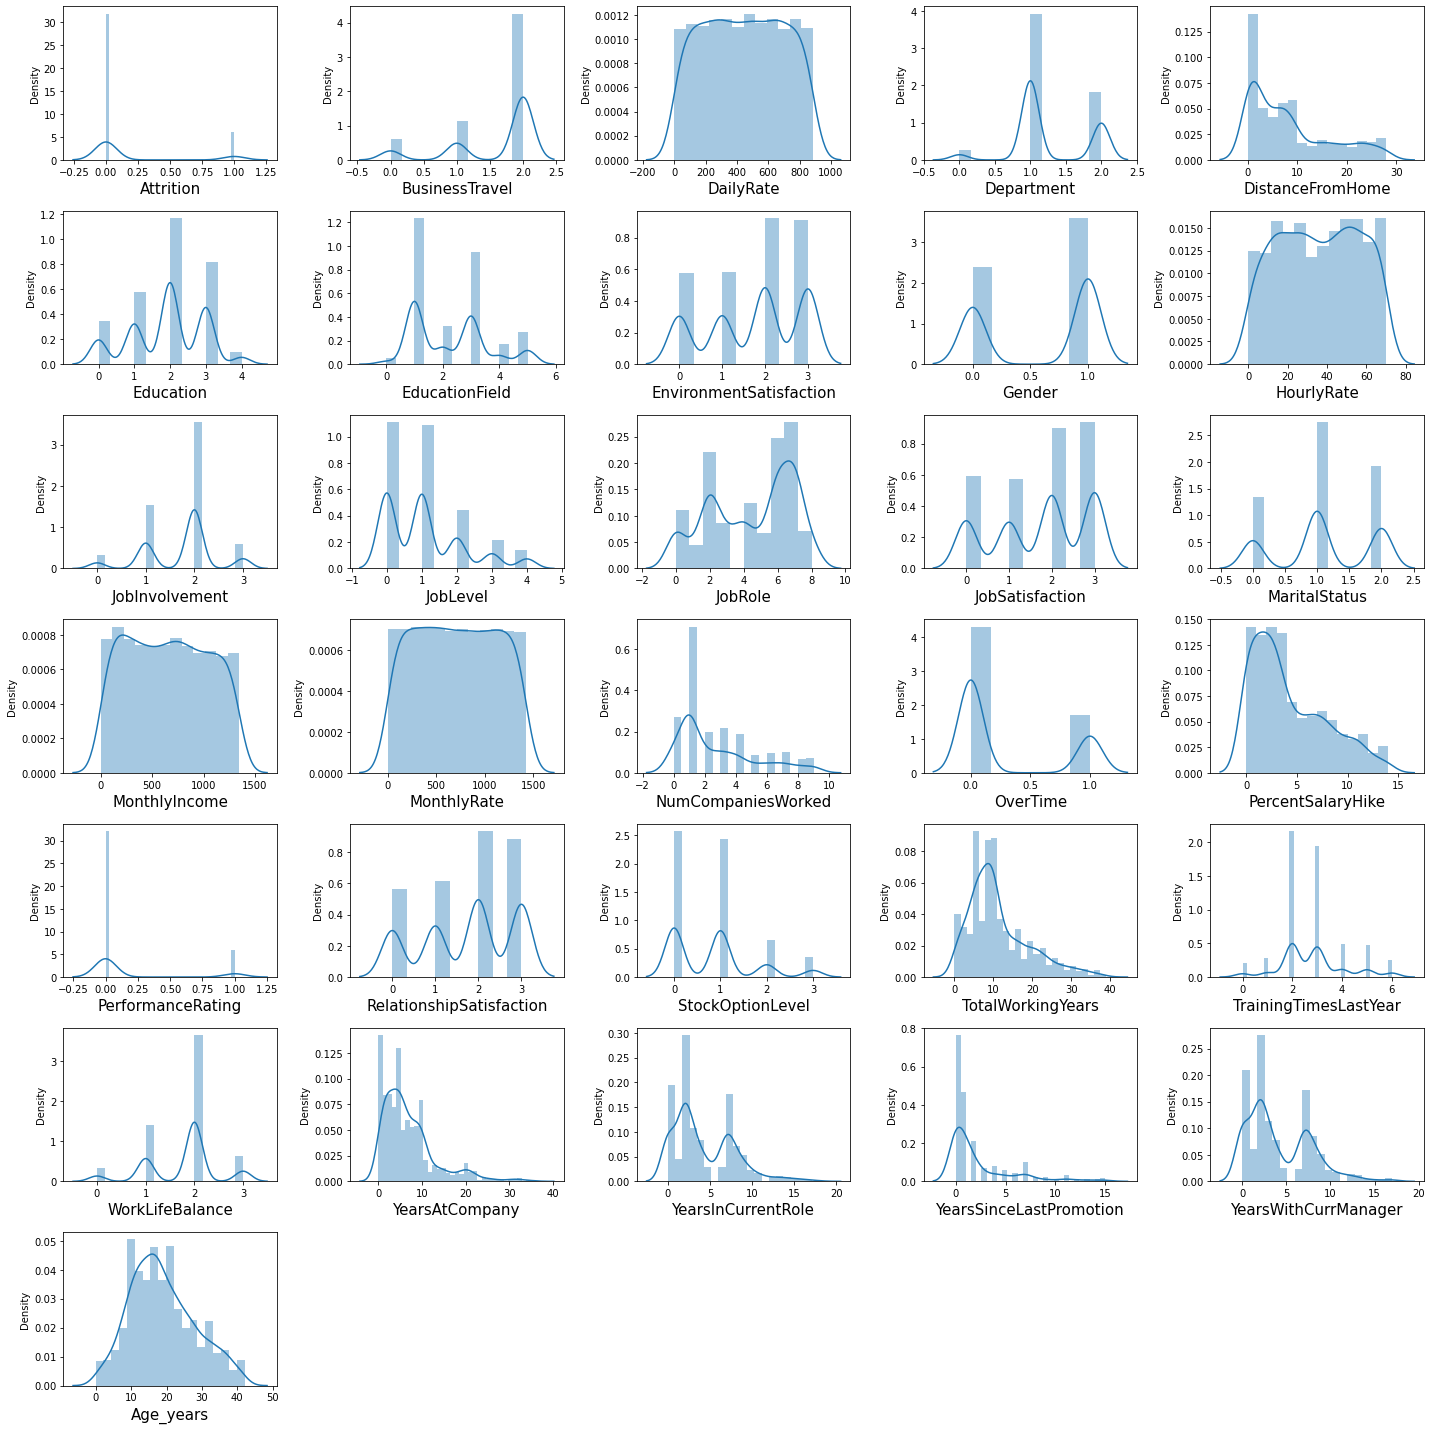

In [496]:
# Plotting our columns
plt.figure(figsize =(20,20), facecolor = 'white')
plotnumber=1

for column in data.columns:
    if plotnumber<=32:
        ax=plt.subplot(7,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

In [497]:
#Split data
X = data.iloc[:, 1:data.shape[1]]
Y = data.iloc[:, 0]

In [498]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_scaler = scaler.fit_transform(X)


In [499]:
#split the data into 75% training and 25% testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.75, random_state = 27)

# Upsampling of our label

In [500]:
from sklearn.utils import resample
X = pd.concat([X_train, Y_train], axis = 1)

In [501]:
AY = X[X.Attrition ==1]
AN = X[X.Attrition ==0]

In [502]:
AY.shape # shape of high quality

(169, 31)

In [503]:
AN.shape # shape of high quality

(933, 31)

In [504]:
AY_upsampled = resample(AY, replace = True, n_samples = len(AN), random_state = 27) # upsampling

In [505]:
upsampled = pd.concat([AN, AY_upsampled])

In [506]:
upsampled.Attrition.value_counts()

1    933
0    933
Name: Attrition, dtype: int64

In [507]:
X = upsampled.drop(columns = ['Attrition'], axis = 1)
Y = upsampled['Attrition']

# Scaling

In [508]:
# Min_Max Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaler = scaler.fit_transform(X)

# Train test Split

In [509]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaler, Y, train_size = 0.75, random_state = 27)

# Model Building


# Logistic Regression

In [510]:
log_reg = LogisticRegression()

In [511]:
log_reg.fit(X_train, Y_train)

LogisticRegression()

In [512]:
log_reg.score(X_train, Y_train)

0.7898498927805575

In [513]:
Y_pred = log_reg.predict(X_test)

In [514]:
log_reg.score(X_test, Y_test)

0.7730192719486081

In [515]:
accuracy = accuracy_score(Y_test, Y_pred)

In [516]:
accuracy

0.7730192719486081

In [517]:
# we are getting 77.30% accuracy

In [538]:
from sklearn.model_selection import cross_val_score
lr_cv_score = cross_val_score(log_reg, X, Y, cv = 5)

In [539]:
lr_cv_mean = lr_cv_score.mean()

In [540]:
lr_cv_mean

0.7063210563289416

# K-NN model

In [518]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [519]:
knn.score(X_train, Y_train)

0.8920657612580415

In [520]:
knn.score(X_test, Y_test)

0.8265524625267666

In [521]:
# we are getting 82.65% accuracy

In [541]:
knn_cv_score = cross_val_score(knn, X, Y, cv = 5)

In [542]:
knn_cv_mean = knn_cv_score.mean()

In [543]:
knn_cv_mean

0.7813622743759947

# Decision Tree Classifier

In [522]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)


DecisionTreeClassifier()

In [523]:
dt.score(X_train, Y_train)

1.0

In [524]:
dt.score(X_test, Y_test)

0.9079229122055674

In [525]:
# we are getting 88.86%

In [544]:
dt_cv_score = cross_val_score(dt, X, Y, cv = 5)

In [545]:
dt_cv_mean = dt_cv_score.mean()
dt_cv_mean

0.9271150234405241

# Random Forest Classifier

In [526]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [527]:
clf.fit(X_train,Y_train)

RandomForestClassifier()

In [528]:
clf.score(X_train,Y_train)

1.0

In [529]:
clf.score(X_test,Y_test)

0.974304068522484

In [531]:
# we are getting 97.21%

In [533]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(clf, X, Y, cv = 5)

In [535]:
cv_mean = cv_score.mean()

In [536]:
cv_mean

0.9791042422330862